In [23]:
from mlflow.tracking import MlflowClient
from mlflow.entities import ViewType
from mlflow import list_run_infos
from urllib.parse import urlparse, unquote_plus
import pandas as pd
import seaborn as sn

In [24]:
# Get experiment
# NOTE: Make sure your CWD is set to the directory where your mlruns/ folder is located.

# import os
# print(os.getcwd()) # Shows the CWD
# os.chdir(NEW_PATH) # Sets the CWD to an arbitrary path.

client = MlflowClient()
experiment = client.get_experiment_by_name("DQN_base_April4")

In [25]:
exp_id = experiment.experiment_id
runs = list_run_infos(exp_id)
runs = sorted(runs, key=lambda r: r.end_time)
latest_run = runs[-1]
artifact_uri = unquote_plus(urlparse(str(latest_run.artifact_uri)).path)
progress_path = artifact_uri + "/progress.csv"
progress = pd.read_csv(progress_path)
progress

,episode_reward_max,episode_reward_min,episode_reward_mean,episode_len_mean,episodes_this_iter,num_healthy_workers,timesteps_total,done,episodes_total,training_iteration,...,info/learner/policy_0/min_q,info/learner/policy_0/max_q,info/learner/policy_0/mean_td_error,info/learner/policy_1/allreduce_latency,info/learner/policy_1/grad_gnorm,info/learner/policy_1/cur_lr,info/learner/policy_1/mean_q,info/learner/policy_1/min_q,info/learner/policy_1/max_q,info/learner/policy_1/mean_td_error
0,34.868544,29.423121,32.219455,100.0,10,2,1000,False,10,1,...,-0.135775,0.163326,-0.196530,0.0,0.210970,0.15,-0.015403,-0.159894,0.099596,-0.123149
1,35.164385,29.346306,32.412841,100.0,10,2,2000,False,20,2,...,6.132314,7.509888,1.157268,0.0,0.012956,0.15,2.992401,2.732197,3.484666,0.034195
2,36.341815,29.346306,32.665643,100.0,10,2,3000,True,30,3,...,6.303375,6.592543,-0.026489,0.0,0.017423,0.15,2.994819,2.851524,3.056755,-0.096159


<AxesSubplot:xlabel='episodes_total', ylabel='episode_reward_mean'>

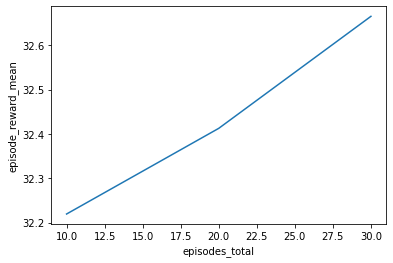

In [40]:
sn.lineplot(data=progress, x="episodes_total",y="episode_reward_mean")